In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
msft_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\Microsoft_weekly.csv', sep = ',',header = 0)

msft_df_tradingview=pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\BATS MSFT, 1W.csv')

In [3]:
msft_df['Date'] = pd.to_datetime(msft_df['Date'], format = '%Y-%m-%d')
msft_df_tradingview[ 'time']=pd.to_datetime(msft_df_tradingview['time'], format = '%Y-%m-%d')
msft_df_tradingview['time'] += pd.Timedelta(days=6)
msft_df_tradingview=msft_df_tradingview[(msft_df_tradingview['time']>=pd.to_datetime('1994-03-06')) & (msft_df_tradingview['time']<=pd.to_datetime('2024-03-03'))]
msft_df_tradingview.reset_index(drop=True, inplace=True)

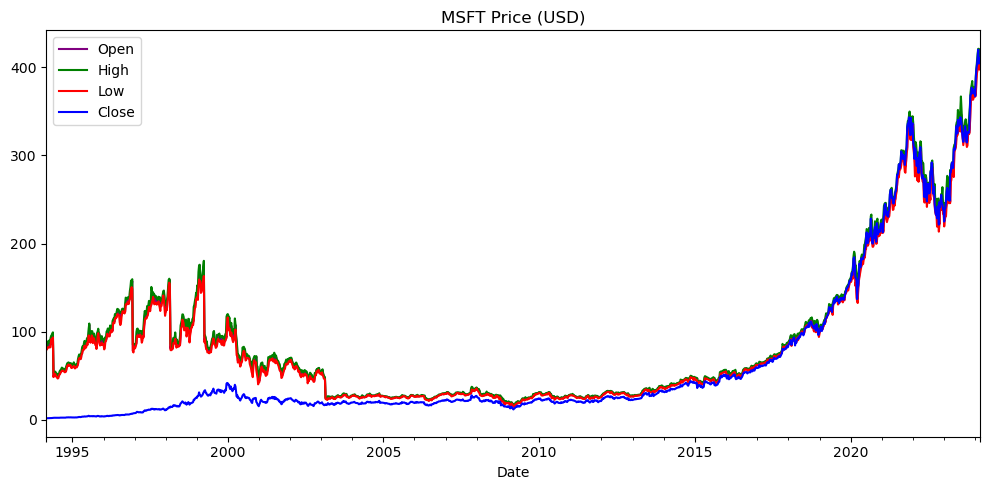

In [4]:
fig,ax=plt.subplots(figsize=(10,5))

msft_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
msft_df.plot(x='Date', y='High', ax=ax, color = 'green')
msft_df.plot(x='Date', y='Low', ax=ax, color = 'red')
msft_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('MSFT Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

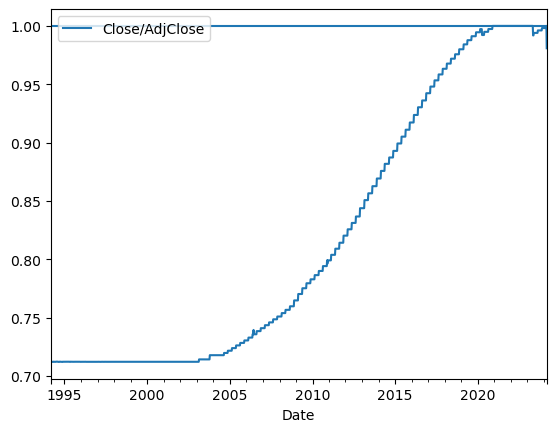

In [5]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=msft_df['Date']
ratio_close['Close/AdjClose']=msft_df['Close']/msft_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=msft_df['Date'].min(), xmax=msft_df['Date'].max())

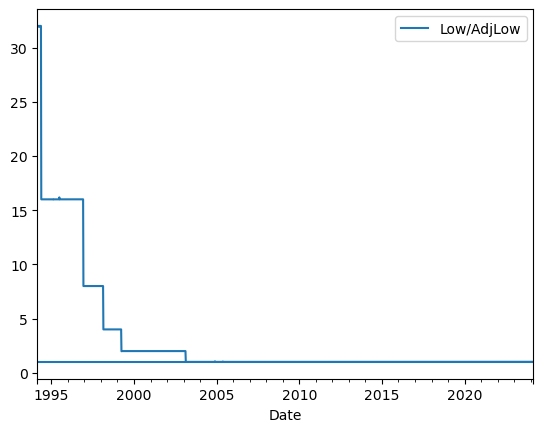

In [6]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()
ratio_close['Date']=msft_df['Date']
ratio_close['Low/AdjLow']=msft_df['Low']/msft_df_tradingview['low']

ratio_close.plot(x='Date', y='Low/AdjLow', ax=ax)
plt.hlines(y=1, xmin=msft_df['Date'].min(), xmax=msft_df['Date'].max())

In [7]:
msft_df.loc[msft_df['Date'] <= pd.to_datetime('2003-02-18'), ['Open', 'High', 'Low']] /= 2
msft_df.loc[msft_df['Date'] <= pd.to_datetime('1999-03-29'), ['Open', 'High', 'Low']] /= 2
msft_df.loc[msft_df['Date'] <= pd.to_datetime('1998-02-23'), ['Open', 'High', 'Low']] /= 2
msft_df.loc[msft_df['Date'] <= pd.to_datetime('1996-12-09'), ['Open', 'High', 'Low']] /= 2
msft_df.loc[msft_df['Date'] <= pd.to_datetime('1994-05-23'), ['Open', 'High', 'Low']] /= 2

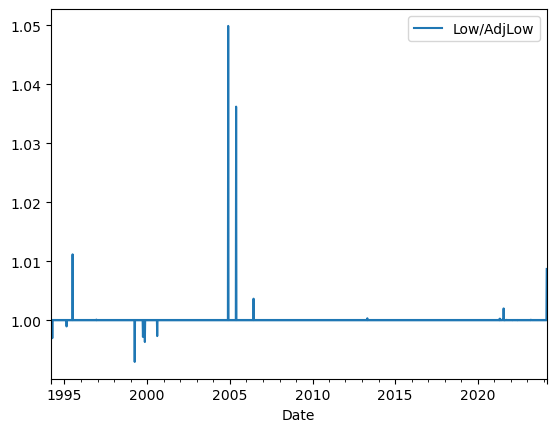

In [8]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()
ratio_close['Date']=msft_df['Date']
ratio_close['Low/AdjLow']=msft_df['Low']/msft_df_tradingview['low']

ratio_close.plot(x='Date', y='Low/AdjLow', ax=ax)
plt.hlines(y=1, xmin=msft_df['Date'].min(), xmax=msft_df['Date'].max())

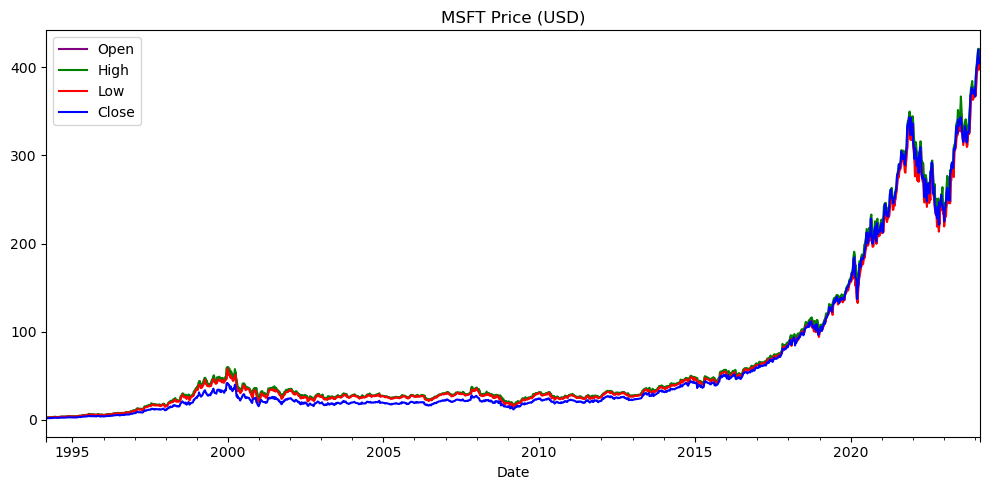

In [9]:
fig,ax=plt.subplots(figsize=(10,5))

msft_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
msft_df.plot(x='Date', y='High', ax=ax, color = 'green')
msft_df.plot(x='Date', y='Low', ax=ax, color = 'red')
msft_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('MSFT Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [10]:
cpi_index_monthly=pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\cpi_index_monthly.csv', sep=';', header=None)
cpi_index_monthly.drop(columns=[0, 4], inplace=True)
cpi_index_monthly.rename(columns={1: 'year', 2:'month', 3:'value'}, inplace=True)

In [11]:
# Convert month abbreviation to numeric format
cpi_index_monthly['month'] = cpi_index_monthly['month'].str.extract('(\d+)').astype(int)

In [12]:
msft_df['year'] = msft_df['Date'].dt.year
msft_df['month'] = msft_df['Date'].dt.month
merged_df = msft_df.merge(cpi_index_monthly, on=['year', 'month'], how='left')

In [13]:
merged_df.rename(columns={'value':'cpi_value'}, inplace=True)
merged_df

,Date,Open,High,Low,Close,Volume,year,month,cpi_value
0,1994-03-06,2.539062,2.601562,2.515625,1.8029,7166700,1994,3,147.100
1,1994-03-13,2.539062,2.570312,2.492188,1.8194,5429200,1994,3,147.100
2,1994-03-20,2.578125,2.664062,2.570312,1.8860,7539800,1994,3,147.100
3,1994-03-27,2.656250,2.789062,2.570312,1.9473,13523800,1994,3,147.100
4,1994-04-03,2.734375,2.750000,2.578125,1.8860,11122900,1994,4,147.200
...,...,...,...,...,...,...,...,...,...
1561,2024-02-04,406.060000,415.320000,397.210000,410.4610,164773351,2024,2,311.054
1562,2024-02-11,409.900000,420.820000,402.910000,419.7737,109333537,2024,2,311.054
1563,2024-02-18,420.555000,420.740000,403.390000,404.0600,113551077,2024,2,311.054
1564,2024-02-25,403.240000,415.860000,397.220000,410.3400,86244739,2024,2,311.054


In [14]:
# Calculate adjustment factor for each year relative to 2024
merged_df['adjustment_factor'] = ((312.23-merged_df['cpi_value'])/merged_df['cpi_value'])

# Adjust the 'Close' price accordingly
merged_df['Close'] *= (1+merged_df['adjustment_factor'])

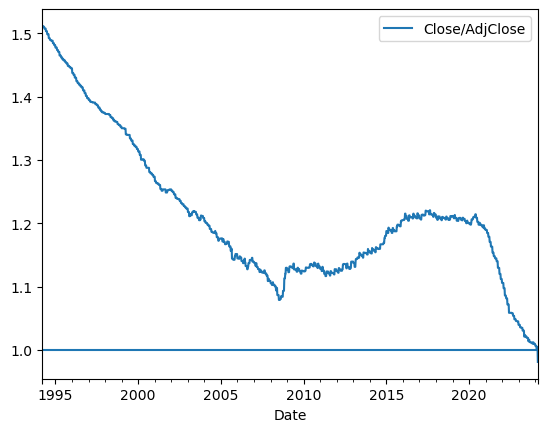

In [15]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=merged_df['Date']
ratio_close['Close/AdjClose']=merged_df['Close']/msft_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=msft_df['Date'].min(), xmax=msft_df['Date'].max())

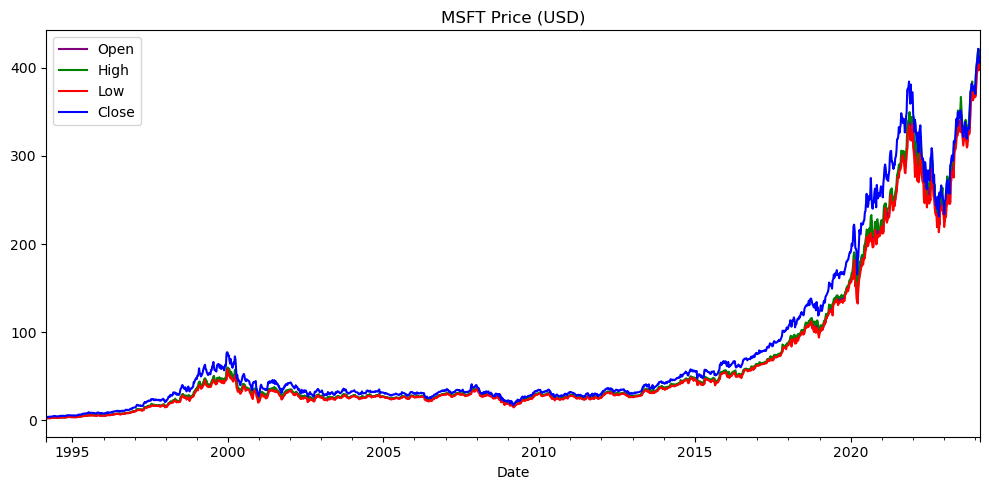

In [16]:
fig,ax=plt.subplots(figsize=(10,5))

msft_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
msft_df.plot(x='Date', y='High', ax=ax, color = 'green')
msft_df.plot(x='Date', y='Low', ax=ax, color = 'red')
merged_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('MSFT Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [17]:
# Calculate 'Inferred_Close' based on the condition 'Low' > 'Close'
msft_df['Inferred_Close'] = msft_df['Open'].shift(periods=-1)
msft_df.loc[msft_df['Low'] > msft_df['Close'], 'Inferred_Close'] = msft_df['Inferred_Close']

# Fill NaN values in 'Inferred_Close' with corresponding 'Close' values
msft_df['Inferred_Close'].fillna(msft_df['Close'], inplace=True)

# Print the resulting DataFrame
msft_df

,Date,Open,High,Low,Close,Volume,year,month,Inferred_Close
0,1994-03-06,2.539062,2.601562,2.515625,1.8029,7166700,1994,3,2.539062
1,1994-03-13,2.539062,2.570312,2.492188,1.8194,5429200,1994,3,2.578125
2,1994-03-20,2.578125,2.664062,2.570312,1.8860,7539800,1994,3,2.656250
3,1994-03-27,2.656250,2.789062,2.570312,1.9473,13523800,1994,3,2.734375
4,1994-04-03,2.734375,2.750000,2.578125,1.8860,11122900,1994,4,2.578125
...,...,...,...,...,...,...,...,...,...
1561,2024-02-04,406.060000,415.320000,397.210000,410.4610,164773351,2024,2,409.900000
1562,2024-02-11,409.900000,420.820000,402.910000,419.7737,109333537,2024,2,420.555000
1563,2024-02-18,420.555000,420.740000,403.390000,404.0600,113551077,2024,2,403.240000
1564,2024-02-25,403.240000,415.860000,397.220000,410.3400,86244739,2024,2,411.455000


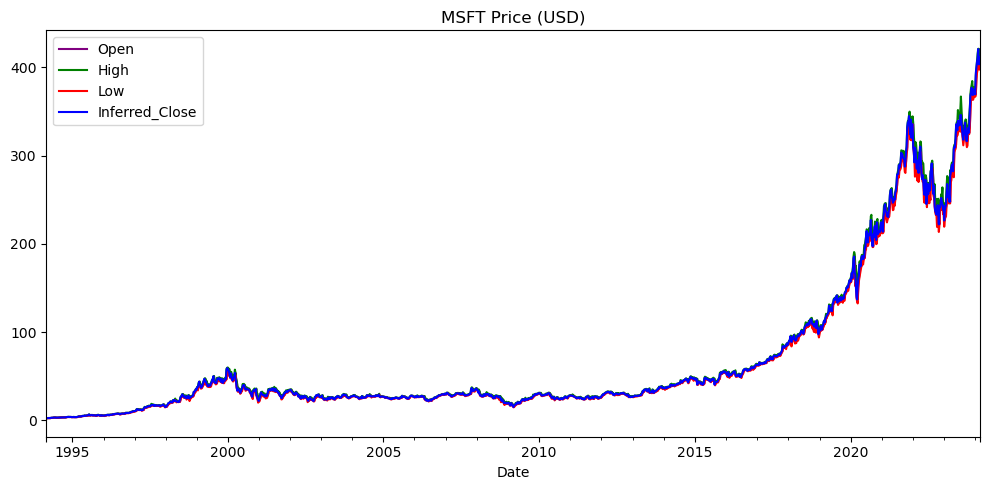

In [18]:
fig,ax=plt.subplots(figsize=(10,5))

msft_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
msft_df.plot(x='Date', y='High', ax=ax, color = 'green')
msft_df.plot(x='Date', y='Low', ax=ax, color = 'red')
msft_df.plot(x='Date', y='Inferred_Close', ax=ax, color = 'blue')
ax.set_title('MSFT Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

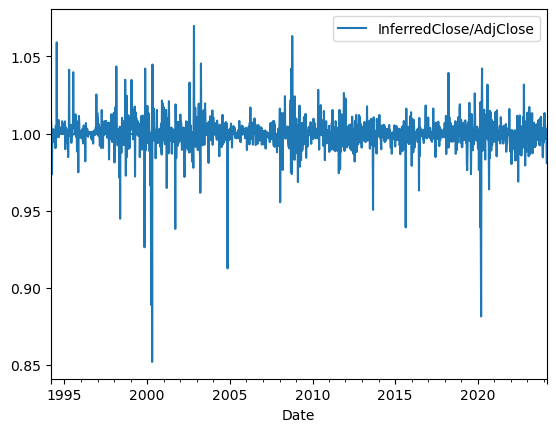

In [19]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=msft_df['Date']
ratio_close['InferredClose/AdjClose']=msft_df['Inferred_Close']/msft_df_tradingview['close']

ratio_close.plot(x='Date', y='InferredClose/AdjClose', ax=ax)
plt.hlines(y=1, xmin=msft_df['Date'].min(), xmax=msft_df['Date'].max())

In [20]:
msft_df_ok=pd.DataFrame()
msft_df_ok['Date']=msft_df['Date']
msft_df_ok['Open']=msft_df['Open']
msft_df_ok['High']=msft_df['High']
msft_df_ok['Low']=msft_df['Low']
msft_df_ok['Close']=msft_df['Inferred_Close']

In [21]:
msft_df_ok

,Date,Open,High,Low,Close
0,1994-03-06,2.539062,2.601562,2.515625,2.539062
1,1994-03-13,2.539062,2.570312,2.492188,2.578125
2,1994-03-20,2.578125,2.664062,2.570312,2.656250
3,1994-03-27,2.656250,2.789062,2.570312,2.734375
4,1994-04-03,2.734375,2.750000,2.578125,2.578125
...,...,...,...,...,...
1561,2024-02-04,406.060000,415.320000,397.210000,409.900000
1562,2024-02-11,409.900000,420.820000,402.910000,420.555000
1563,2024-02-18,420.555000,420.740000,403.390000,403.240000
1564,2024-02-25,403.240000,415.860000,397.220000,411.455000


In [22]:
msft_df_ok.to_csv(path_or_buf='Microsoft_weekly_ok.csv', sep=',', header=True, index=False)